In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import re

In [2]:
HCM_search_list = ['HoChiMinhCity', 'YTD']
file_path = '../Data/Dai su quan My/'
def Filter(datalist):
    return [os.path.join(file_path, val) for val in datalist if all(accept_val in val for accept_val in HCM_search_list)]
list_files_YTDHCM = Filter(listdir(file_path))

In [3]:
data_YTDHCM = pd.concat((pd.read_csv(f) for f in list_files_YTDHCM))

In [4]:
data_YTDHCM

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Ho Chi Minh City,PM2.5 - Principal,2020-01-01 01:00 AM,2020,1,1,1,42.7,119,Unhealthy for Sensitive Groups,52.0,UG/M3,1 Hr,Valid
1,Ho Chi Minh City,PM2.5 - Principal,2020-01-01 02:00 AM,2020,1,1,2,52.3,142,Unhealthy for Sensitive Groups,62.0,UG/M3,1 Hr,Valid
2,Ho Chi Minh City,PM2.5 - Principal,2020-01-01 03:00 AM,2020,1,1,3,50.1,137,Unhealthy for Sensitive Groups,48.0,UG/M3,1 Hr,Valid
3,Ho Chi Minh City,PM2.5 - Principal,2020-01-01 04:00 AM,2020,1,1,4,38.6,109,Unhealthy for Sensitive Groups,27.0,UG/M3,1 Hr,Valid
4,Ho Chi Minh City,PM2.5 - Principal,2020-01-01 05:00 AM,2020,1,1,5,30.8,90,Moderate,23.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Ho Chi Minh City,PM2.5 - Principal,2018-12-31 08:00 PM,2018,12,31,20,13.6,54,Moderate,15.0,UG/M3,1 Hr,Valid
8756,Ho Chi Minh City,PM2.5 - Principal,2018-12-31 09:00 PM,2018,12,31,21,17.3,62,Moderate,21.0,UG/M3,1 Hr,Valid
8757,Ho Chi Minh City,PM2.5 - Principal,2018-12-31 10:00 PM,2018,12,31,22,16.6,60,Moderate,16.0,UG/M3,1 Hr,Valid
8758,Ho Chi Minh City,PM2.5 - Principal,2018-12-31 11:00 PM,2018,12,31,23,15.3,58,Moderate,14.0,UG/M3,1 Hr,Valid


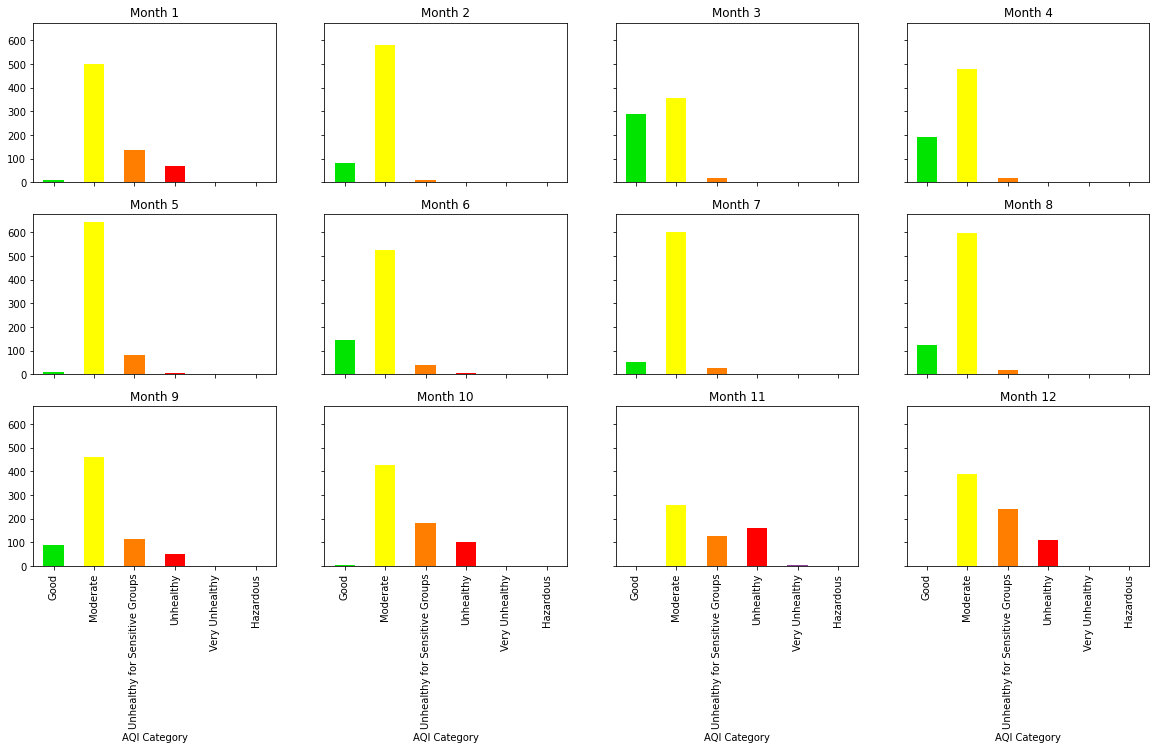

In [49]:
#Cong viec can lam:
#Lay du lieu 1 nam
#Plot AQI tung thang vao 6 bin dua theo co che tinh toan cua viet nam
#Kiem tra tung thang xem AQI thay doi nhu the nao
#Mau sac tung cot se dua vao bang mau Viet Nam
import matplotlib.pyplot as plt

data_YTDHCM_2019 = pd.read_csv('../Data/Dai su quan My/HoChiMinhCity_PM2.5_2019_YTD.csv')
data_group_YTDHCM_2019 = data_YTDHCM_2019.groupby(by=['Month', 'AQI Category'])['Site'].count()
data_group_YTDHCM_2019 = data_group_YTDHCM_2019.unstack(level=1).fillna(0).T
data_group_YTDHCM_2019 = data_group_YTDHCM_2019.loc[['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'], :]

fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)
#Color get from Viet Nam law
plot_columns_colors = [(0,228,0), (255,255,0), (255,126,0), (255,0,0), (143,63,151), (126,0,35)]
plot_columns_hex_colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']
month = 0
for row in range(0,3):
    for column in range(0, 4):
        data = data_group_YTDHCM_2019.iloc[:, month]
        data.plot.bar(x = 'AQI Category', ax = axes[row, column], title = 'Month {0}'.format(month + 1), color = plot_columns_hex_colors, figsize=(20,10))
        month += 1

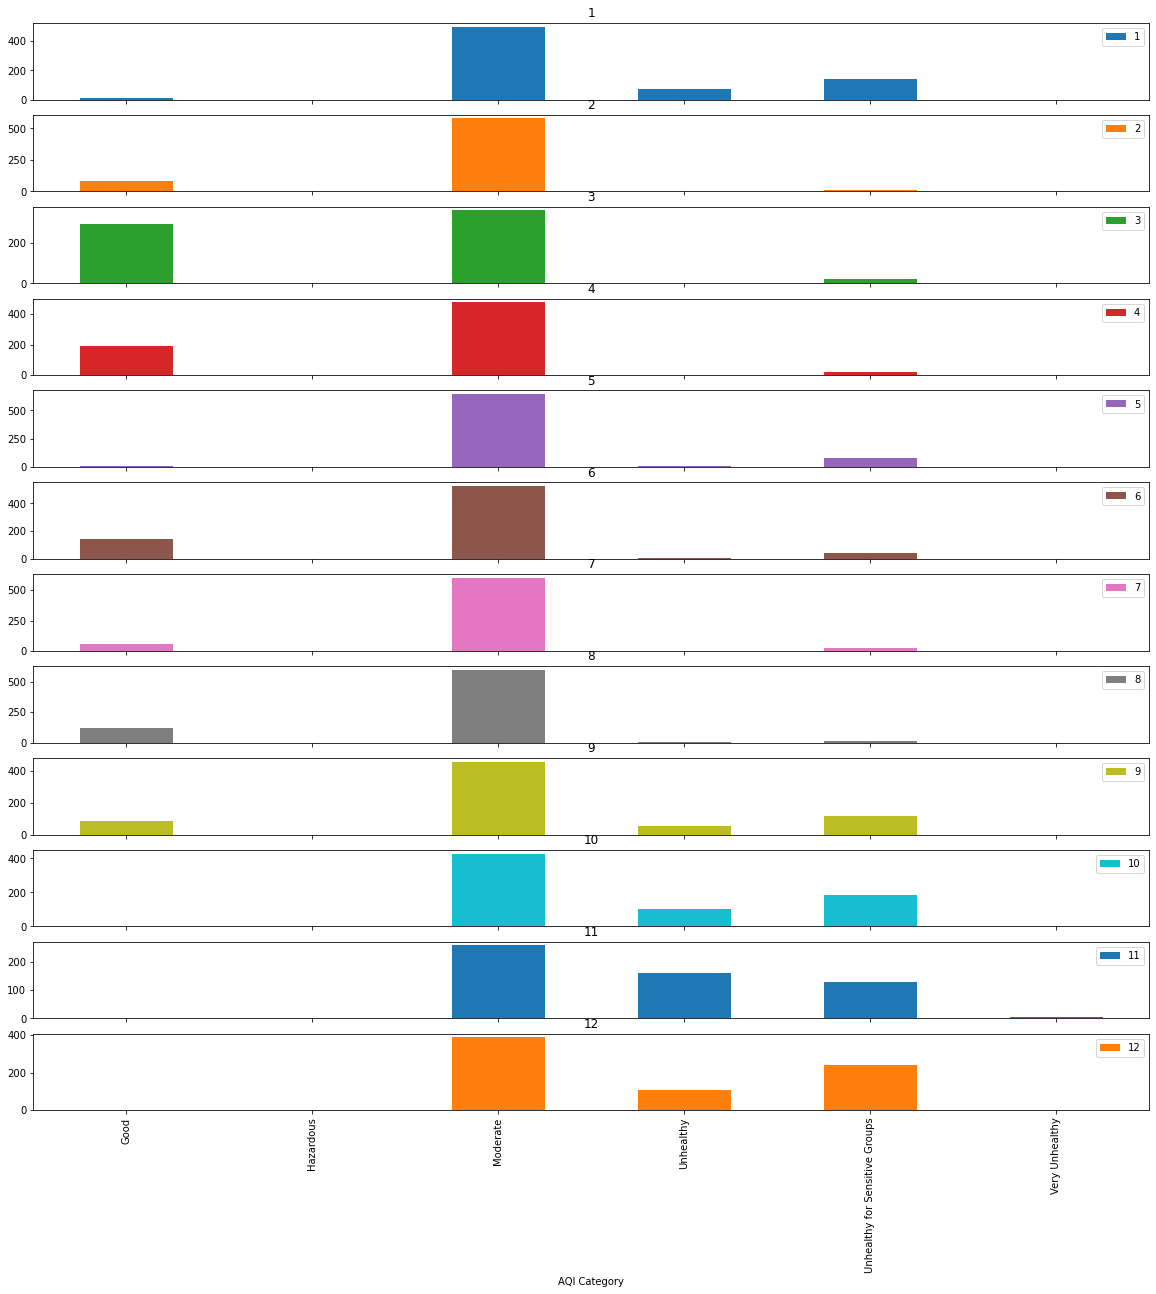

In [8]:
data_group_YTDHCM_2019.unstack(level=1).fillna(0).transpose().plot(kind='bar', subplots=True, figsize=(20,20))
plt.show()

In [ ]:
#https://vanbanphapluat.co/quyet-dinh-1459-qd-tcmt-2019-ky-thuat-tinh-toan-va-cong-bo-chi-so-chat-luong-khong-khi-viet-nam
def create_BP_df():
    BP_Ii = [0,50,100,150,200,300,400,500]
    BP_O3_1h = [0,160,200,300,400,800,1000,1200]
    BP_O3_8h = [0,120,170,210,400]
    BP_CO = [0,10000,30000,45000,60000,90000,120000,150000]
    BP_SO2 = [0,125,350,550,800,1600,2100,2630]
    BP_NO2 = [0,100,200,700,1200,2350,3100,3850]
    BP_PM10 = [0,50,150,250,350,420,500,600]
    BP_PM25 = [0,25,50,80,150,250,350,500]
    BP = pd.DataFrame(data = [range(1,9),BP_Ii, BP_O3_1h, BP_O3_8h, BP_CO, BP_SO2, BP_NO2, BP_PM10, BP_PM25],
                      index=['I','Ii','O3','O3_8h','CO','SO2','NO2','PM10','PM25'], dtype= np.int64)
    BP = BP.transpose().set_index('I')
    #Add a upper to calculate I = 8
    BP.loc[9] = [999999,999999,999999,999999,999999,999999,999999,999999]
    BP.index = BP.index.astype(np.int64)
    return BP
global_BP = create_BP_df()